In [1]:
# Install required packages

!pip install ultralytics -q

!pip install transformers -q

!pip install networkx -q

!pip install kaggle -q

!pip install kagglehub -q

!pip install pyyaml -q

!pip install pyvis -q

!pip install supervision -q

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.utils import check_data_config

# This runs the check and returns the path
DATA_YAML = check_data_config()

Config found: /workspace/dl4cv-final-project/sku110k_fixed.yaml
--------------------
names:
  0: product
path: /workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed
test: images/test
train: images/train
val: images/val

--------------------


In [3]:
from src.tuning import run_hyperparameter_tuning

# RT-DETR Large (Transformer)
MODEL_WEIGHT = "rtdetr-l.pt"

print(f"Launching RT-DETR Hyperparameter Tuning on {MODEL_WEIGHT}...")

# --- RUN TUNING ---
results = run_hyperparameter_tuning(
    model_type="RTDETR",
    model_weight=MODEL_WEIGHT,
    data_yaml=DATA_YAML,
    iterations=3, 
    epochs=10,
    project_dir="../runs/rt-detr-l/tune",
    batch_size=16
)

print("RT-DETR Tuning Complete. Results saved in ../runs/rt-detr-l/tune")

Launching RT-DETR Hyperparameter Tuning on rtdetr-l.pt...
Starting Tuning for RTDETR (rtdetr-l.pt)...
   Target: 3 iterations of 10 epochs each.
Tuner: Initialized Tuner instance with 'tune_dir=/workspace/dl4cv-final-project/runs/rt-detr-l/tune/tune_RTDETR_rtdetr-l2'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/3 with hyperparameters: {'lr0': 0.001, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'box': 0.2, 'cls': 0.5, 'mosaic': 0.5, 'mixup': 0.0}
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32110MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=0.2, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/dl4cv-final-project/sku110k_fixed.yaml, degrees=0.0, deterministic=True, device=None, 

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/10      23.3G      1.807     0.2197     0.4888       1023        640: 100% ━━━━━━━━━━━━ 512/512 1.6it/s 5:11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 1.6it/s 12.0s
                   all        584      90456      0.361      0.696      0.417      0.148

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/10      23.3G      1.117     0.4175      0.193       1198        640: 100% ━━━━━━━━━━━━ 512/512 2.1it/s 3:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.7s
                   all        584      90456      0.466      0.794      0.547      0.275

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/10      23.8G     0.8997     0.4622     0.1499       1214        640: 100% ━━━━━━━━━━━━ 512/512 2.2it/s 3:58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456       0.52      0.741      0.597      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/10      23.6G     0.6896     0.4972     0.1233       1463        640: 100% ━━━━━━━━━━━━ 512/512 2.2it/s 3:57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.616      0.759      0.707      0.425

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       5/10      23.4G     0.6185     0.4916     0.1042       1142        640: 100% ━━━━━━━━━━━━ 512/512 2.1it/s 4:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.1it/s 8.9s
                   all        584      90456      0.634      0.782      0.738      0.454

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       6/10      23.3G     0.5875      0.453    0.09771       1047        640: 100% ━━━━━━━━━━━━ 512/512 2.1it/s 3:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.789      0.815      0.824      0.502

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       7/10      23.5G     0.5727     0.4315    0.09435       1552        640: 100% ━━━━━━━━━━━━ 512/512 2.1it/s 3:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.7s
                   all        584      90456      0.808      0.815      0.843      0.531

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       8/10      23.5G     0.5466     0.4246    0.08711       1317        640: 100% ━━━━━━━━━━━━ 512/512 2.2it/s 3:55
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.854      0.816      0.874      0.551

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       9/10      23.4G     0.5295     0.4181      0.083       1171        640: 100% ━━━━━━━━━━━━ 512/512 2.2it/s 3:56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.858      0.818      0.873      0.557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      10/10      23.1G     0.5204     0.4151    0.08027       1287        640: 100% ━━━━━━━━━━━━ 512/512 2.2it/s 3:57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.862      0.824      0.878      0.561

10 epochs completed in 0.710 hours.
Optimizer stripped from /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train2/weights/last.pt, 66.2MB
Optimizer stripped from /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train2/weights/best.pt, 66.2MB

Validating /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train2/weights/best.pt...
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32110MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 1.4s/it 26.9s
                   all 

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/10      23.3G      1.682     0.2528     0.4429       1023        640: 100% ━━━━━━━━━━━━ 512/512 1.7it/s 5:06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 1.6it/s 12.0s
                   all        584      90456      0.226      0.437      0.196     0.0473

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/10      23.3G      1.092     0.4308     0.1968       1198        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.6s
                   all        584      90456      0.414      0.736      0.439      0.196

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/10      24.3G     0.7601     0.5154     0.1337       1214        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.492       0.78       0.58      0.342

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/10      23.6G     0.6327     0.5193     0.1099       1463        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.578       0.76      0.679      0.409

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       5/10      23.4G     0.6113     0.4814     0.1032       1142        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.7s
                   all        584      90456      0.747      0.806      0.808      0.508

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       6/10      23.3G     0.5769     0.4381    0.09602       1047        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.1it/s 8.9s
                   all        584      90456       0.82      0.777      0.839      0.529

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       7/10      23.5G     0.5636     0.4297    0.09291       1552        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.819      0.796      0.852      0.539

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       8/10      23.5G     0.5526      0.433    0.08946       1317        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.846      0.788       0.86      0.551

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       9/10      23.4G     0.5386     0.4237    0.08634       1171        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.834        0.8      0.854      0.549

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      10/10      23.1G      0.534     0.4296     0.0854       1287        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.806      0.804      0.835      0.537

10 epochs completed in 0.789 hours.
Optimizer stripped from /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train3/weights/last.pt, 66.2MB
Optimizer stripped from /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train3/weights/best.pt, 66.2MB

Validating /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train3/weights/best.pt...
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32110MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 1.4s/it 27.4s
                   all 

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/10      23.3G      1.714     0.2453      0.459       1023        640: 100% ━━━━━━━━━━━━ 512/512 1.7it/s 5:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 1.6it/s 12.1s
                   all        584      90456      0.178      0.345      0.153     0.0451

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/10      23.3G      1.146     0.4114     0.2066       1198        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.7s
                   all        584      90456      0.151      0.293      0.116     0.0299

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/10      24.3G     0.8273     0.5132     0.1445       1214        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.7s
                   all        584      90456      0.477       0.75      0.541      0.305

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/10      23.6G     0.6753     0.5182     0.1188       1463        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.7s
                   all        584      90456      0.604      0.693      0.657      0.381

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       5/10      23.4G     0.6427     0.5155     0.1115       1142        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.1it/s 8.8s
                   all        584      90456      0.572       0.77      0.686      0.436

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       6/10      23.3G     0.6059     0.4924     0.1032       1047        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.817      0.794       0.83      0.507

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       7/10      23.5G     0.6297     0.4487     0.1091       1552        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.1it/s 8.9s
                   all        584      90456      0.809      0.697      0.765      0.458

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       8/10      23.5G     0.6252     0.4437     0.1092       1317        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.1it/s 8.9s
                   all        584      90456      0.781      0.783      0.808      0.502

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       9/10      23.3G     0.5929     0.4384     0.1007       1171        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.834      0.771      0.838      0.526

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:829: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      10/10      23.1G     0.5722     0.4346    0.09428       1287        640: 100% ━━━━━━━━━━━━ 512/512 1.9it/s 4:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.8s
                   all        584      90456      0.797      0.815      0.836      0.533

10 epochs completed in 0.796 hours.
Optimizer stripped from /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train2/weights/last.pt, 66.2MB
Optimizer stripped from /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train2/weights/best.pt, 66.2MB

Validating /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train2/weights/best.pt...
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32110MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 1.5s/it 29.3s
                   all 

In [10]:
from src.visualization import print_best_hyperparameters, show_tuning_plots, print_tuning_csv

# Path to the folder named "tune_RTDETR_rtdetr" (contains yaml/pngs)
SUMMARY_DIR = "../runs/rt-detr-l/tune/tune_RTDETR_rtdetr-l"

print_best_hyperparameters(SUMMARY_DIR)

BEST HYPERPARAMETERS
# 3/3 iterations complete ✅ (8568.09s)
# Results saved to /workspace/dl4cv-final-project/runs/rt-detr-l/tune/tune_RTDETR_rtdetr-l2
# Best fitness=0.56139 observed at iteration 1
# Best fitness metrics are {'metrics/precision(B)': 0.86237, 'metrics/recall(B)': 0.8238, 'metrics/mAP50(B)': 0.87835, 'metrics/mAP50-95(B)': 0.56139, 'val/giou_loss': 0.50388, 'val/cls_loss': 0.41443, 'val/l1_loss': 0.08431, 'fitness': 0.56139}
# Best fitness model is /workspace/dl4cv-final-project/runs/rt-detr-l/tune/train2
lr0: 0.001
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
box: 0.2
cls: 0.5
mosaic: 0.5
mixup: 0.0



Global Tuning Plots:
--- tune_fitness.png ---


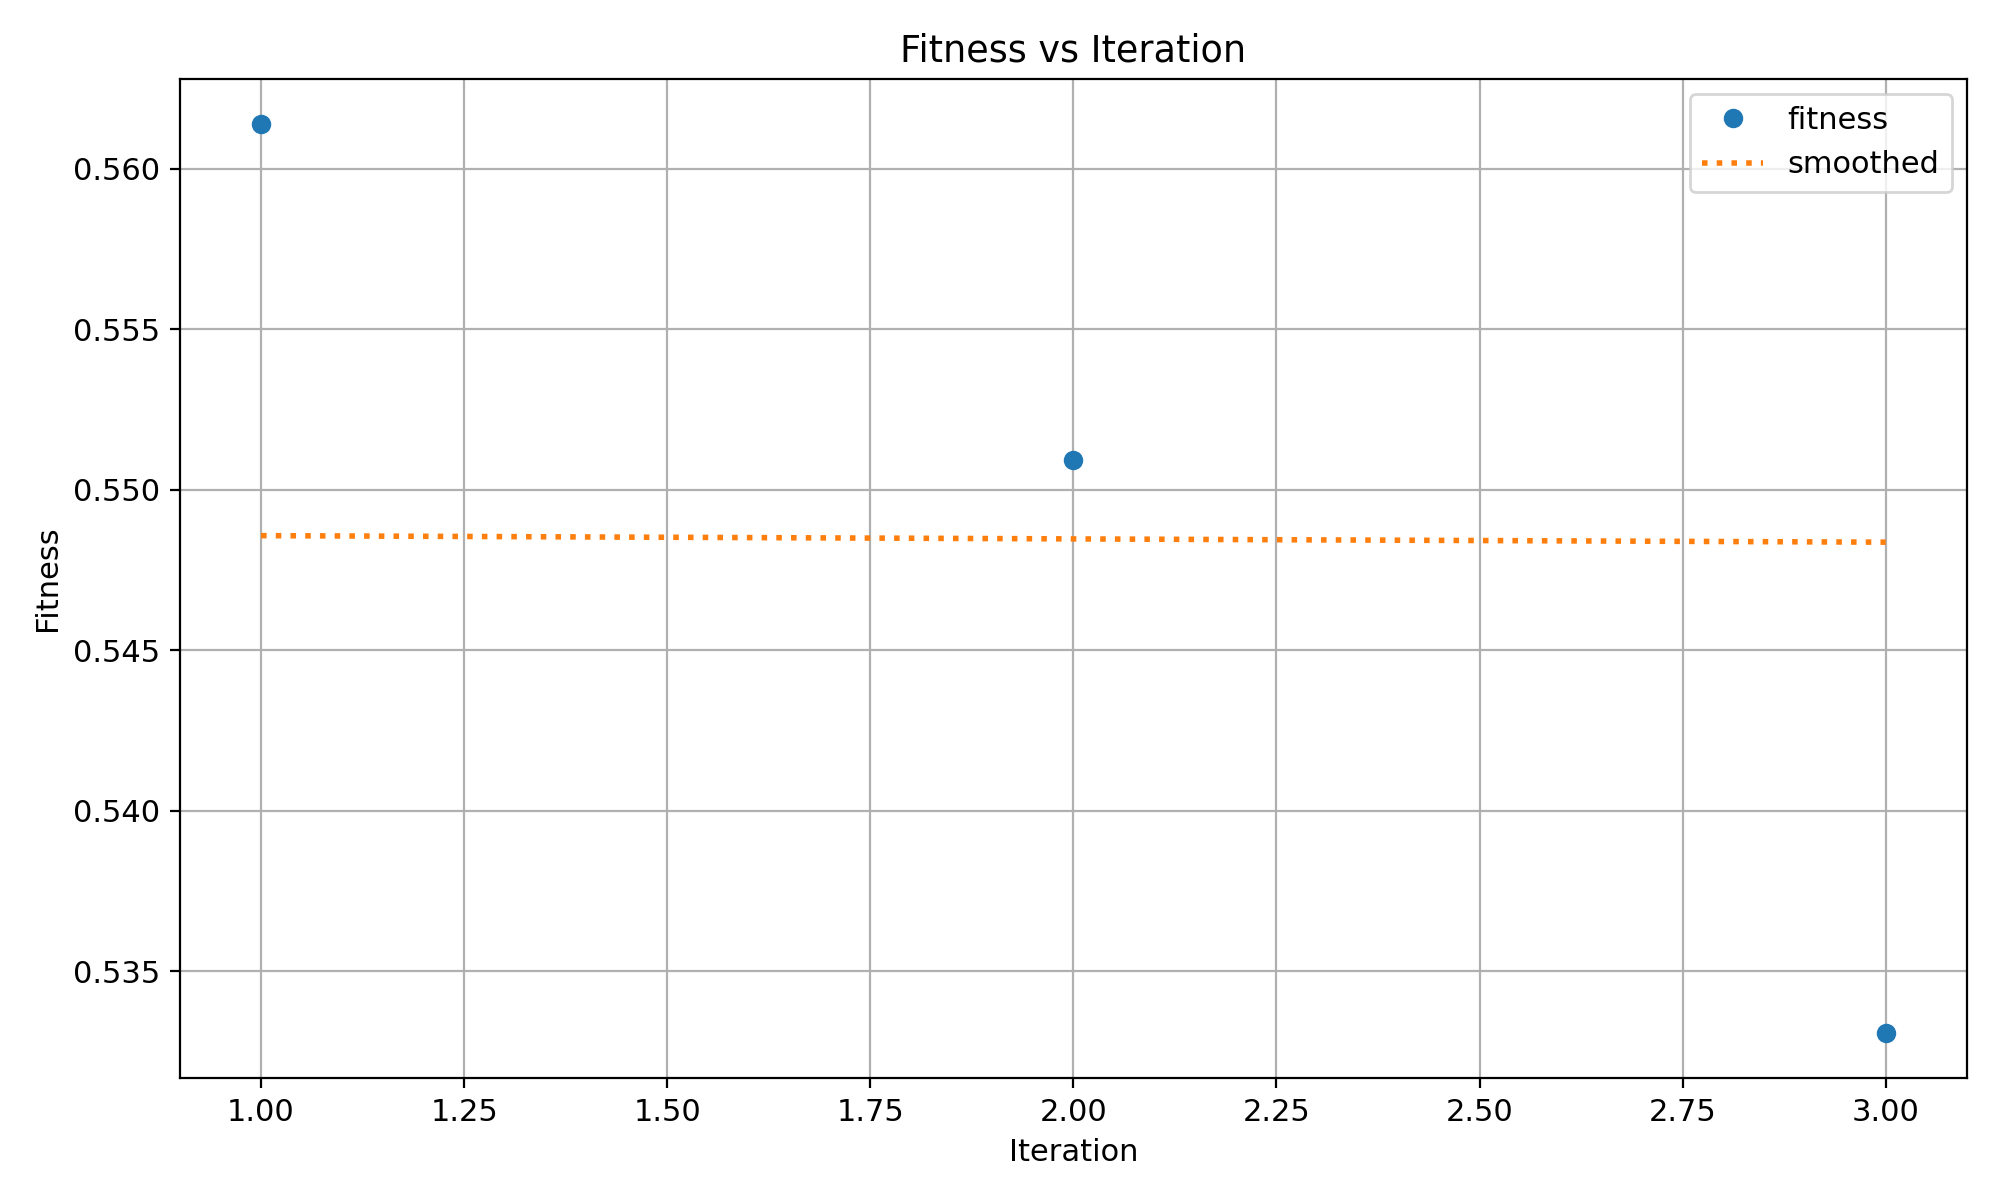

--- tune_scatter_plots.png ---


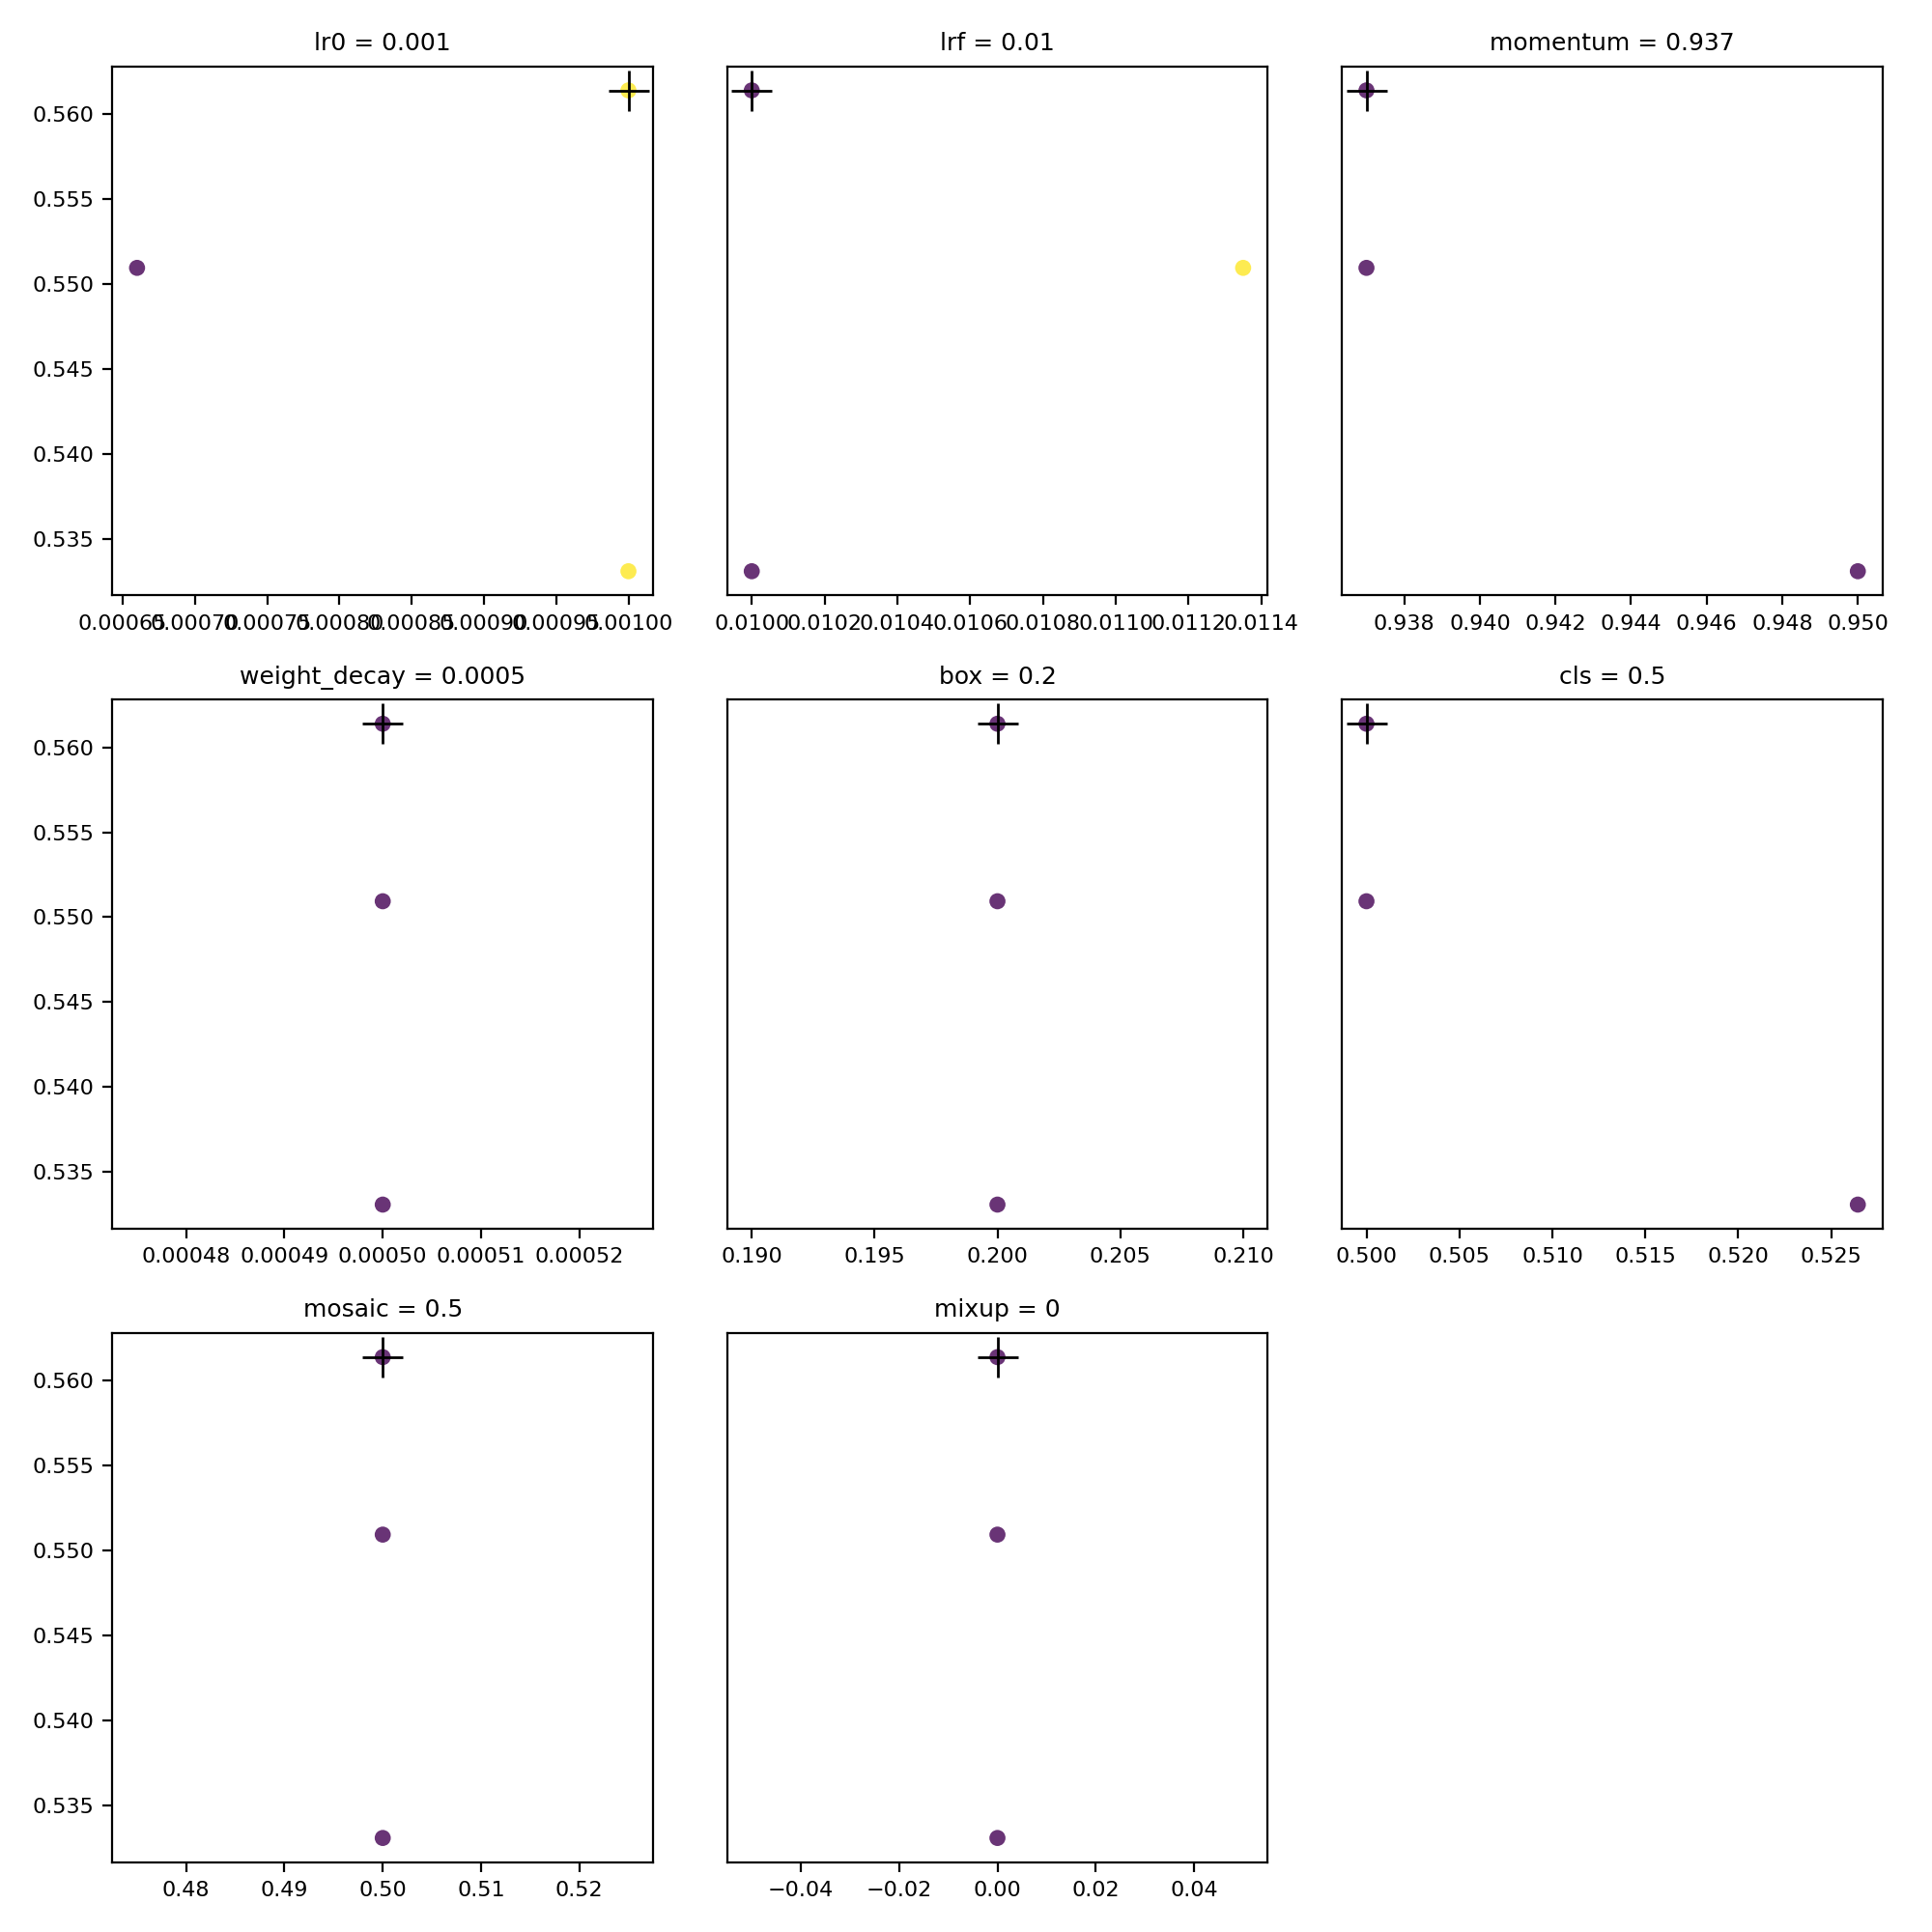

In [11]:
show_tuning_plots(SUMMARY_DIR)

In [6]:
print_tuning_csv(SUMMARY_DIR)

tune_results.csv not found.



Scanning for training runs in: ../runs/rt-detr-l/tune


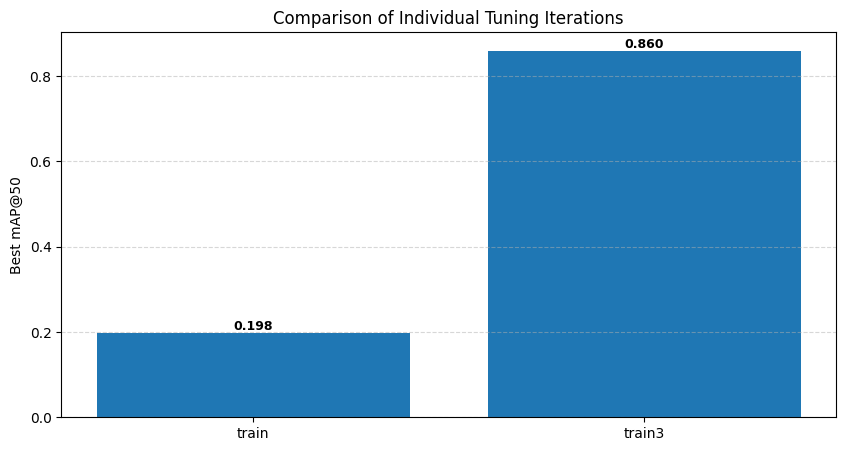

In [7]:
%matplotlib inline

from src.visualization import compare_tuning_runs

# Path to the PARENT folder (contains train, train2, train3)
ROOT_DIR = "../runs/rt-detr-l/tune"

compare_tuning_runs(ROOT_DIR)

In [16]:
print("\nRunning Final Evaluation on Test Set...")

from ultralytics import RTDETR

model = RTDETR("../runs/rt-detr-l/tune/tune_RTDETR_rtdetr-l/weights/best.pt") 

# Run Validation on the TEST split
# We force split='test' so it uses the 'test' folder defined in your yaml
test_metrics = model.val(data=DATA_YAML, split='test')

# Extract & Print Key Metrics
# Ultralytics stores these in the .box attribute or results_dict
print("\n" + "="*30)
print("FINAL TEST SET RESULTS")
print("="*30)
print(f"Precision:   {test_metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall:      {test_metrics.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP@50:      {test_metrics.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP@50-95:   {test_metrics.results_dict['metrics/mAP50-95(B)']:.4f}")
print("="*30)


Running Final Evaluation on Test Set...
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32110MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6885.1±910.6 MB/s, size: 1059.0 KB)
val: Scanning /workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed/labels/test.cache... 2920 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2920/2920 306.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 183/183 3.4it/s 53.7s
                   all       2920     429411      0.859      0.838      0.892      0.572
Speed: 0.7ms preprocess, 9.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /workspace/dl4cv-final-project/notebooks/runs/detect/val3

FINAL TEST SET RESULTS
Precision:   0.8590
Recall:      0.8378
mAP@50:      0.8918
mAP@50-95:   0.